In [2]:
import pandas as pd
from pvlib.irradiance import gti_dirint,aoi
from pvlib.solarposition import get_solarposition

# Load GTI data from sensor

<AxesSubplot:title={'center':'Sensor GTI (W/m²)'}, xlabel='date'>

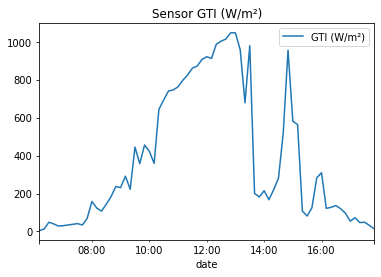

In [3]:
df = pd.read_csv('data.csv')
df.date = pd.to_datetime(df.date,format='%d/%m/%Y %H:%M')
df = df.set_index('date')
df.index = df.index.tz_localize('America/Martinique')
df.plot(title='Sensor GTI (W/m²)')

In [4]:
longitude = -61.087
latitude = 14.494
albedo = 0.2
tilt = 26
azimuth = -93

In [5]:
solpos = get_solarposition(df.index, latitude, longitude)
panel_aoi = aoi(tilt, azimuth, solpos["zenith"], solpos["azimuth"])

In [6]:
result = gti_dirint(df['GTI (W/m²)'],panel_aoi, solpos["zenith"], solpos["azimuth"], df.index, tilt, azimuth, max_iterations=50)

/home/lilian/.local/lib/python3.8/site-packages/pvlib/irradiance.py:2042: RuntimeWarning: 3 points failed to converge after 50 iterations. best_diff:
date
2021-09-27 08:00:00-04:00    9999.000000
2021-09-27 13:00:00-04:00       1.681083
2021-09-27 17:50:00-04:00       0.971233
dtype: float64
  warnings.warn(


# Plot calculated GHI, it is miscalculated at 8:00

<AxesSubplot:xlabel='date'>

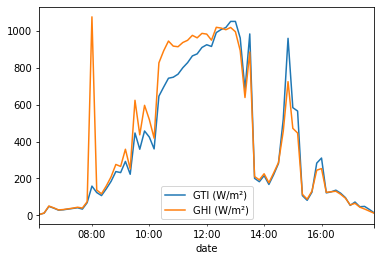

In [7]:
pd.merge(df,result['ghi'].rename("GHI (W/m²)"),left_index=True,right_index=True).plot()

# The miscalculated point occurs with the following AOI and GTI parameters:

In [8]:
pd.merge(df,panel_aoi,left_index=True,right_index=True).loc['2021-09-27 08:00']

GTI (W/m²)    158.357771
aoi            85.837152
Name: 2021-09-27 08:00:00-04:00, dtype: float64